Test your network with different numbers of layers and neurons and present the best result found.

Describe the problem that you have chosen.

1. If possible, provide a link (kaggle?) with details on the problem/dataset.
2. What is the input? What is the output?
3. What type of problem is this?
4. What are the features or attributes that you will use from the dataset.
5. What is your evaluation metric? Accuracy? RMSE? MAE? Recall/Precision?

# Creating the dataset


In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pandas_datareader as data_reader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

yf.pdr_override()

In [67]:
X = pdr.get_data_yahoo("AMZN", start="2019-01-01", end="2020-01-01")

[*********************100%%**********************]  1 of 1 completed


In [68]:
X


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000
2019-01-08,83.234497,83.830498,80.830498,82.829002,82.829002,177628000
...,...,...,...,...,...,...
2019-12-24,89.690498,89.778503,89.378998,89.460503,89.460503,17626000
2019-12-26,90.050499,93.523003,89.974998,93.438499,93.438499,120108000
2019-12-27,94.146004,95.070000,93.300499,93.489998,93.489998,123732000


In [69]:
y

,Close
Date,
2019-01-02,76.956497
2019-01-03,75.014000
2019-01-04,78.769501
2019-01-07,81.475502
2019-01-08,82.829002
...,...
2019-12-24,89.460503
2019-12-26,93.438499
2019-12-27,93.489998


Text(0.5, 1.0, 'Amazon Stock Closing Price')

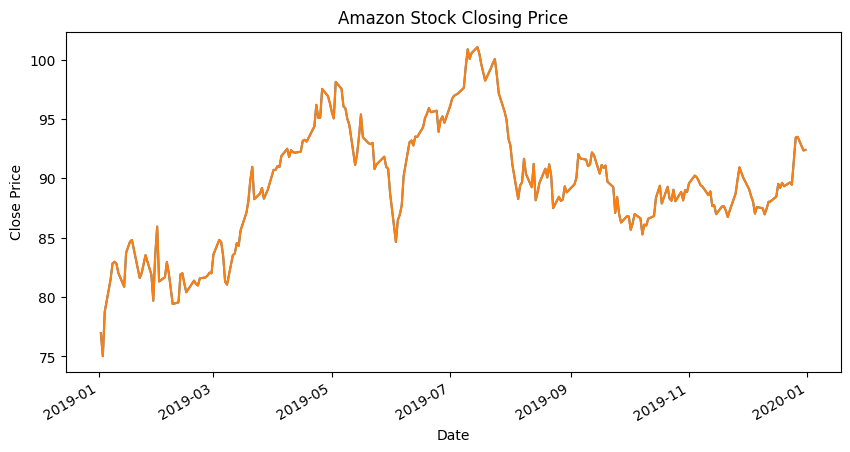

In [70]:
plt.figure(figsize=(10, 5))
X['Close'].plot()
y['Close'].plot()
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price')


# Splitting the dataset

In [71]:
y = X[['Close']]
X = X[['Open', 'High', 'Low', 'Volume']]

print(y[:5])
print(X[:5])

                Close
Date                 
2019-01-02  76.956497
2019-01-03  75.014000
2019-01-04  78.769501
2019-01-07  81.475502
2019-01-08  82.829002
                 Open       High        Low     Volume
Date                                                  
2019-01-02  73.260002  77.667999  73.046501  159662000
2019-01-03  76.000504  76.900002  74.855499  139512000
2019-01-04  76.500000  79.699997  75.915497  183652000
2019-01-07  80.115501  81.727997  79.459503  159864000
2019-01-08  83.234497  83.830498  80.830498  177628000


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
)

print(len(df))
print(len(X_train))
print(len(X_test))

252
189
63


In [73]:
regr = linear_model.LinearRegression()

In [74]:
regr.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = regr.predict(X_test)